In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# 2. Load dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                      columns=iris['feature_names'] + ['target'])

In [3]:
# 3. Print no.of rows and columns
print("Number of rows and columns:", iris_df.shape)
print()

Number of rows and columns: (150, 5)



In [4]:
# 4. Print dataframe into data types
print("Data types:")
print(iris_df.dtypes)
print()

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object



In [5]:
# 5. Print attribute names
print("Attribute names:")
print(iris_df.columns)
print()

Attribute names:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')



In [6]:
# 6. Print top 5 rows
print("Top 5 rows:")
print(iris_df.head())
print()

Top 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  



In [7]:
# 7. Print bottom 5 rows
print("Bottom 5 rows:")
print(iris_df.tail())
print()

Bottom 5 rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  



In [8]:
# 8. Print the unique class labels
print("Unique class labels:")
print(iris_df['target'].unique())
print()

Unique class labels:
[0. 1. 2.]



In [9]:
# 9. Print no of examples from each class label and no of missing values in each column
print("Number of examples from each class:")
print(iris_df['target'].value_counts())
print("\nNumber of missing values in each column:")
print(iris_df.isnull().sum())
print()

Number of examples from each class:
target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

Number of missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64



In [10]:
# 11. Print summary statistics
print("Summary statistics:")
print(iris_df.describe())
print()

Summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  



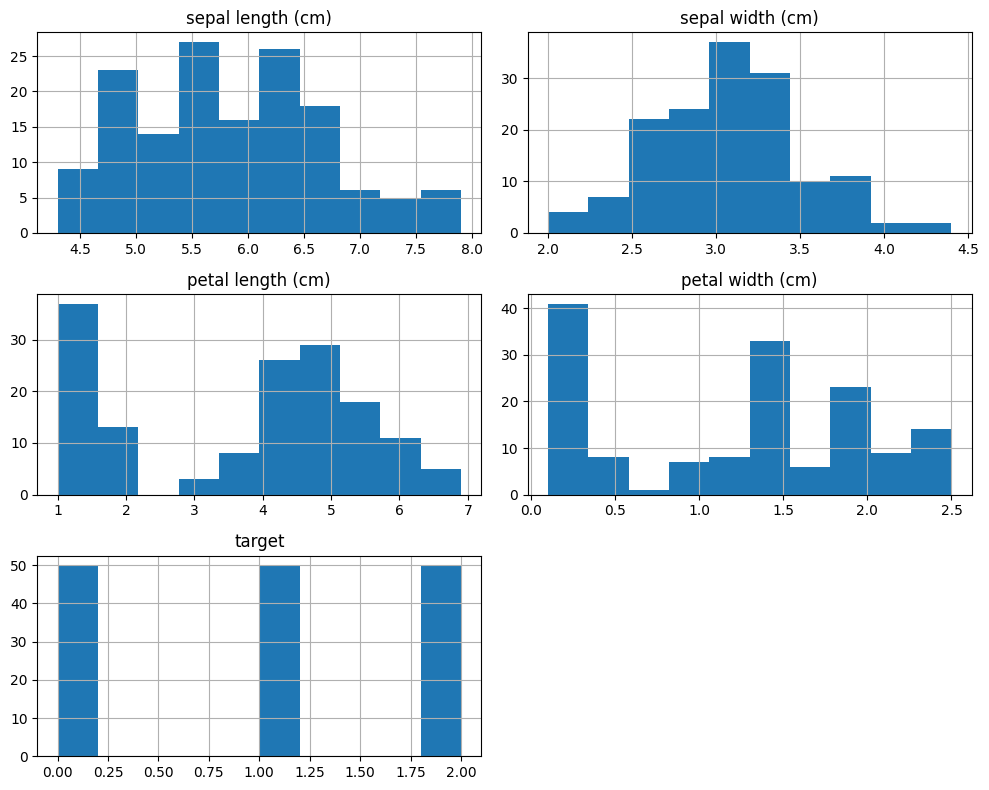

In [11]:
# 12. Plot histogram of all input features
iris_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


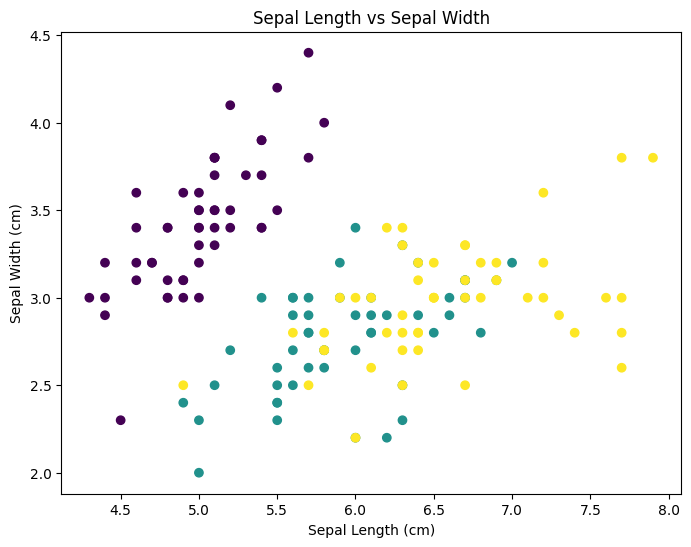

In [12]:
# 13. Create a scatter plot of 'sepal length (cm)' vs 'sepal width (cm)'
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

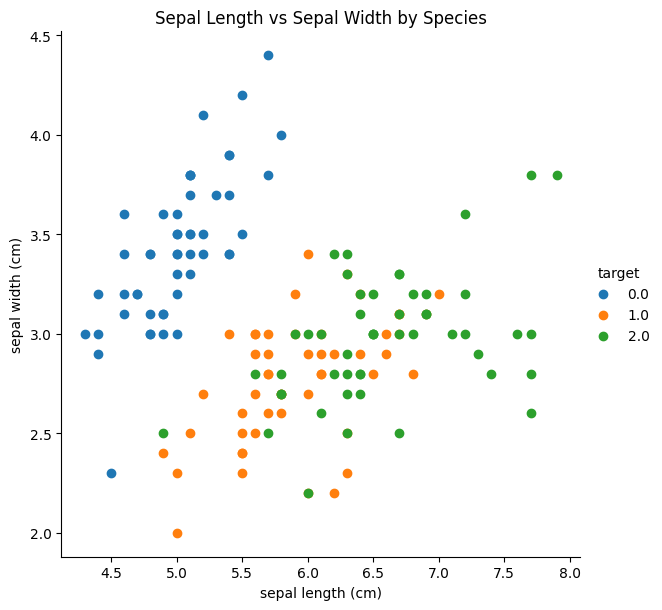

In [13]:
# 14. Create a scatter plot of 'sepal length (cm)' vs 'sepal width (cm)' using seaborn's facetgrid
g = sns.FacetGrid(iris_df, hue='target', height=6)
g.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')
g.add_legend()
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

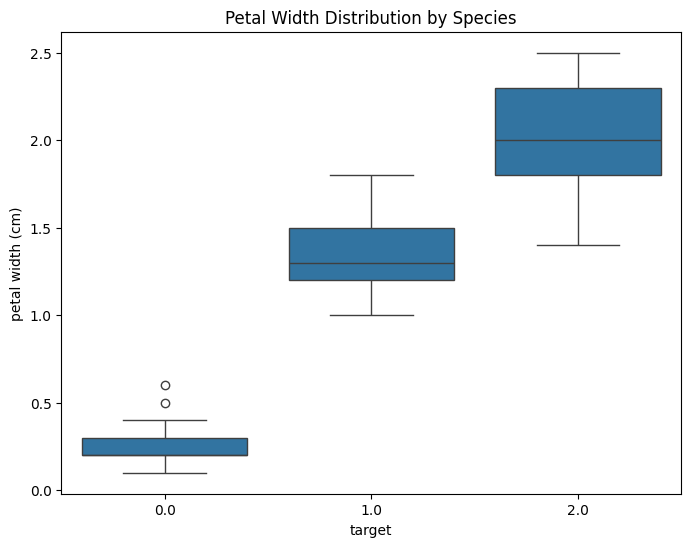

In [14]:

# 15. Boxplot of petal width for different species
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='petal width (cm)', data=iris_df)
plt.title('Petal Width Distribution by Species')
plt.show()

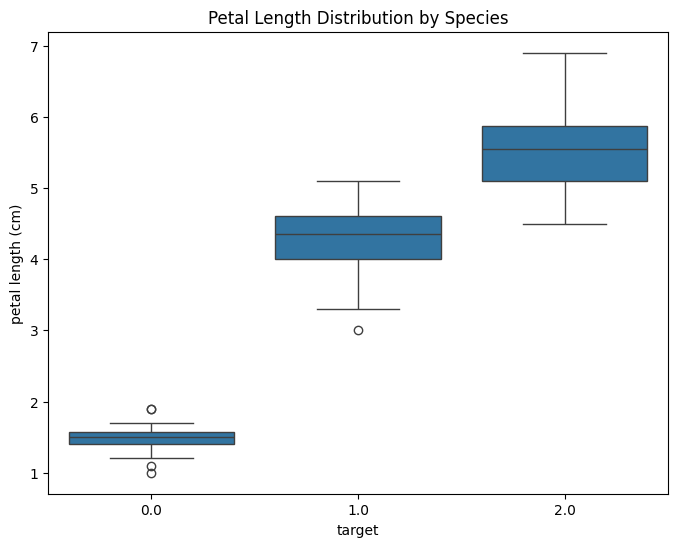

In [15]:
# 16. Boxplot of petal length for different species
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='petal length (cm)', data=iris_df)
plt.title('Petal Length Distribution by Species')
plt.show()

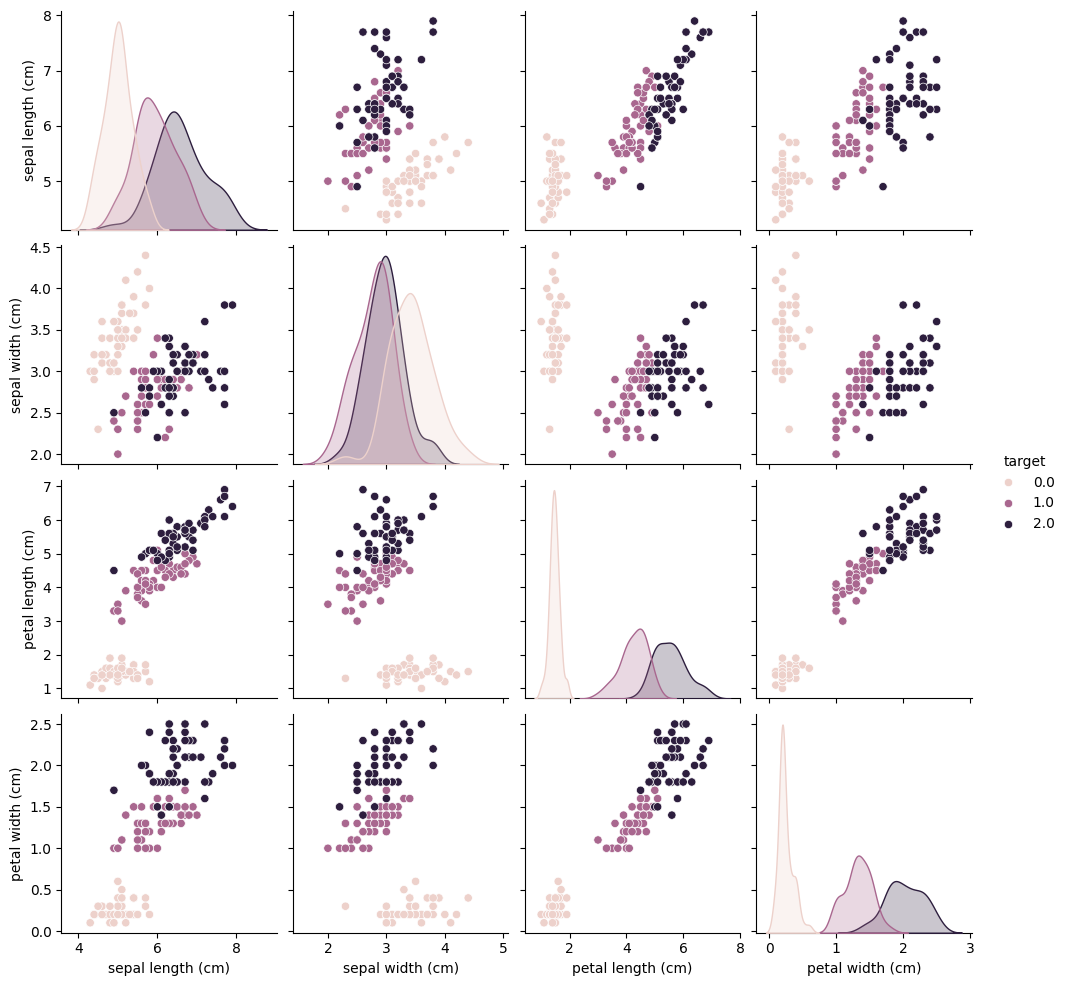

In [16]:

# 17. Pairplot of all input features colored by species
sns.pairplot(iris_df, hue='target', height=2.5)
plt.show()

In [17]:
# 18. Print the correlation among different features
print("Correlation matrix:")
print(iris_df.corr())
print()


Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  



In [18]:
# 19. Prepare x and y
X = iris_df.drop('target', axis=1)
y = iris_df['target']


In [19]:
# 20. Split into train and test data - 70% train, random state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# 23. C=1, instantiate an object of class SVC using cost
svm_model = SVC(C=1, kernel='linear', random_state=1)

In [21]:
# 24. Fit the model
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [22]:

# 25. Predict using the model
y_pred = svm_model.predict(X_test)

In [23]:
# 26. Evaluate the model using confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]



In [24]:
# 27. Print other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

Accuracy: 0.9777777777777777



In [25]:
# 28. Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.94      0.97        18
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




In [26]:
# 29. K-fold cross validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print()

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001



In [27]:
# 30-35. Use grid search CV to find optimal value of C
# 31. Try with C=[0.1,1,10,100,1000]
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [28]:
# 32. Specify no of folds for K-fold CV
grid_search = GridSearchCV(SVC(kernel='linear', random_state=1), param_grid, cv=5)

In [29]:
# 33. Fit tree on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [30]:

# 34. Print the scores of grid search cv as data frame
results = pd.DataFrame(grid_search.cv_results_)
print("Grid Search CV results:")
print(results[['param_C', 'mean_test_score', 'std_test_score']])
print()

Grid Search CV results:
  param_C  mean_test_score  std_test_score
0     0.1         0.961905        0.046657
1       1         0.961905        0.035635
2      10         0.952381        0.052164
3     100         0.923810        0.071270
4    1000         0.933333        0.071270



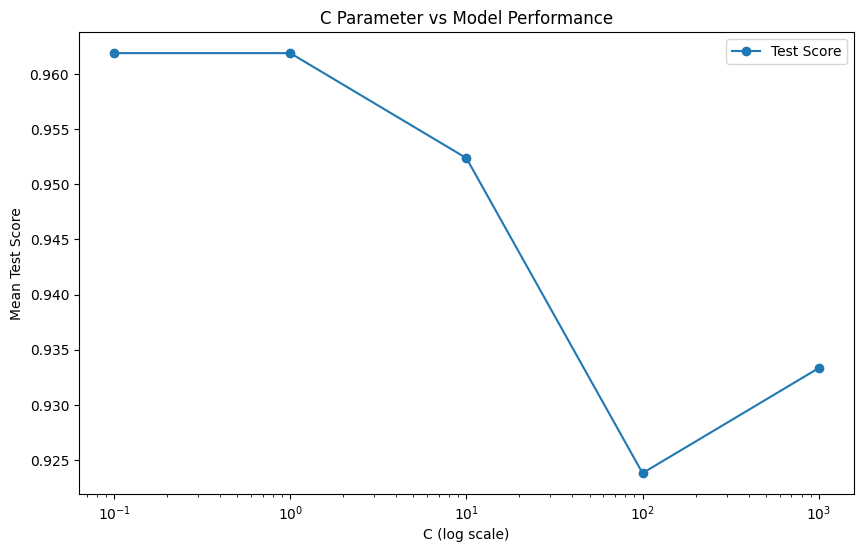

In [31]:
# 35. Plot of C versus train and test scores
plt.figure(figsize=(10, 6))
plt.plot(param_grid['C'], results['mean_test_score'], marker='o', label='Test Score')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Test Score')
plt.title('C Parameter vs Model Performance')
plt.legend()
plt.show()

In [32]:

# 36. Print the best score and best C value
print("Best score:", grid_search.best_score_)
print("Best C value:", grid_search.best_params_['C'])

Best score: 0.961904761904762
Best C value: 1
